In [16]:
# import
import constants
from detections import Detections

import functions_split_working_days_saturdays_sundays_sum
import functions_traffic_analysis

import functions_split_working_days_saturdays_sundays_mean
import graph
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

In [17]:
# Scelta del file su cui effettuare analisi, specificare:
#   + periodo_tempo: intervallo di tempo in mesi
#   + rete_stradale: Anderlecht, Bruxelles o Paese belga
#   + risoluzione_temporale: delta di tempo per cui viene fatta una rilevazione

print("Benvenuto! Inizia l'analisi dei dati per prevedere le condizioni di traffico stradale.")

# Scelta di default
periodo_tempo = constants.range_01_03_2019
rete_stradale = constants.anderlecht
risoluzione_temporale = constants.granularity_05min

# Scelta del periodo di tempo
input_valido = False
while not input_valido:
    periodo_tempo = int(input("Seleziona un periodo di tempo. Inserisci 1, 2 o 3:\n"
                              "[1] Dal 01/01/2019 al 01/03/2019\n"
                              "[2] dal 13/03/2021 al 06/06/2021\n"
                              "[3] dal 05/06/2021 al 16/10/2021\n"))

    if periodo_tempo == 1:
        periodo_tempo = constants.range_01_03_2019
        input_valido = True
    elif periodo_tempo == 2:
        periodo_tempo = constants.range_03_06_2021
        input_valido = True
    elif periodo_tempo == 3:
        periodo_tempo = constants.range_06_10_2021
        input_valido = True
    else:
        print("ERRORE. Input non valido. Riprova.")
        input_valido = False

# Scelta della rete stradale
input_valido = False
while not input_valido:
    rete_stradale = int(input("Seleziona una rete stradale. Inserisci 1, 2 o 3:\n"
                              "[1] Comune di Anderlecht\n"
                              "[2] Regione di Bruxelles\n"
                              "[3] Paese belga\n"))

    if rete_stradale == 1:
        rete_stradale = constants.anderlecht
        input_valido = True
    elif rete_stradale == 2:
        rete_stradale = constants.bruxells
        input_valido = True
    elif rete_stradale == 3:
        rete_stradale = constants.belgium
        input_valido = True
    else:
        print("ERRORE. Input non valido. Riprova.")
        input_valido = False

# Scelta della risoluzione temporale delle rilevazioni
input_valido = False
while not input_valido:
    risoluzione_temporale = int(input("Seleziona una risoluzione temporale delle rilevazioni. Inserisci 5, 15, 30 o 60:\n"
                                      "[5] 5 minuti\n"
                                      "[15] 15 minuti\n"
                                      "[30] 30 minuti\n"
                                      "[60] 60 minuti (Nota. Valida solo per il Belgio nei periodi:\n"
                                      "+ dal 01/01/2019 al 01/03/2019\n"
                                      "+ dal 05/06/2021 al 16/10/2021)\n"))

    if risoluzione_temporale == 5:
        risoluzione_temporale = constants.granularity_05min
        input_valido = True
    elif risoluzione_temporale == 15:
        risoluzione_temporale = constants.granularity_15min
        input_valido = True
    elif risoluzione_temporale == 30:
        risoluzione_temporale = constants.granularity_30min
        input_valido = True
    elif risoluzione_temporale == 60 and periodo_tempo in (constants.range_01_03_2019, constants.range_06_10_2021) and rete_stradale == constants.belgium:
        risoluzione_temporale = constants.granularity_60min
        input_valido = True
    else:
        print("ERRORE. Input non valido. Riprova.")
        input_valido = False

print("Hai scelto di effetuare analisi sui seguenti dati:")
print("Periodo di tempo selezionato. Anno: " + periodo_tempo[10:] + " "
      "dal giorno/mese: " + periodo_tempo[0:2] + "/" + periodo_tempo[2:4] +
      " al giorno/mese " + periodo_tempo[5:7] + "/" + periodo_tempo[7:9])
print("Rete stradale: ", rete_stradale)
print("Risoluzione temporale rilevazioni: ", risoluzione_temporale)


Benvenuto! Inizia l'analisi dei dati per prevedere le condizioni di traffico stradale.
Hai scelto di effetuare analisi sui seguenti dati:
Periodo di tempo selezionato. Anno: 2019 dal giorno/mese: 01/01 al giorno/mese 01/03
Rete stradale:  Bel
Risoluzione temporale rilevazioni:  05min


In [18]:
# Connessione a MongoDB per il successivo recupero dati
mongodb_driver = Detections("mongodb://localhost:27017")

In [19]:
# Recupero dei dati per le analisi seguenti
data_frame, data_frame_working_, data_frame_saturday_, data_frame_sunday_ = functions_split_working_days_saturdays_sundays_sum.init_functions_split_working_days_saturdays_sundays_sum(mongodb_driver, rete_stradale, risoluzione_temporale, periodo_tempo)

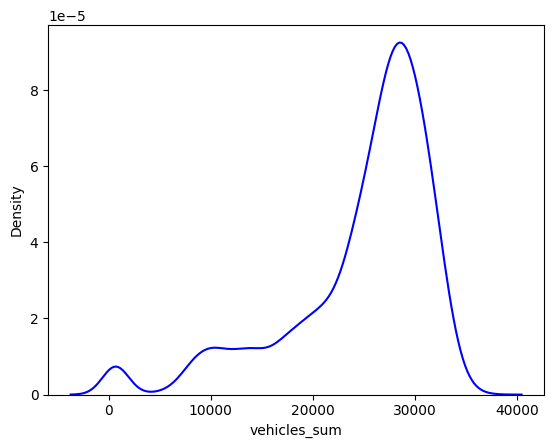

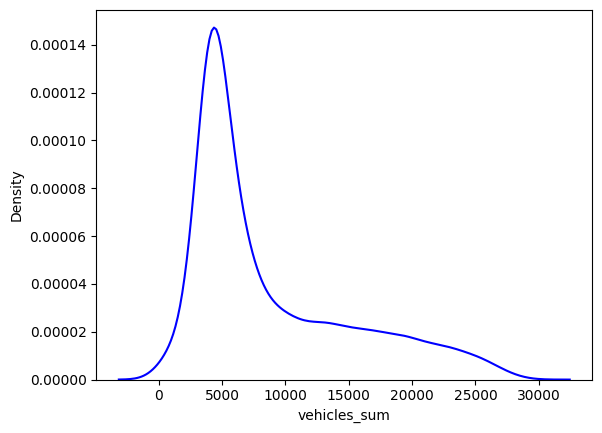

In [20]:
# Scelta del tipo di analisi da fare

input_valido = False
while not input_valido:
    scelta = int(input("Seleziona il tipo di analisi da effettuare:\n"
                       "+ Conteggio veicoli nei giorni:\n"
                       "[1] tutti i giorni\n"
                       "[2] lavorativi\n"
                       "[3] sabato\n"
                       "[4] domenica\n"
                       "[5] giorno e notte nei giorni lavorativi\n\n"
                       "+ Visualizzare il modello giornaliero medio:\n"
                       "[6] tutti i giorni\n"
                       "[7] sabato\n"
                       "[8] domenica\n"
                       "[9] tutti i giorni, sabato, domenica\n"
                       "[0] EXIT\n"))

    if scelta == 1:
        functions_split_working_days_saturdays_sundays_sum.total_distributions(data_frame)
        input_valido = True
    elif scelta == 2:
        functions_split_working_days_saturdays_sundays_sum.working_days_distribution(data_frame_working_)
        input_valido = True
    elif scelta == 3:
        functions_split_working_days_saturdays_sundays_sum.saturdays_distribution(data_frame_saturday_)
        input_valido = True
    elif scelta == 4:
        functions_split_working_days_saturdays_sundays_sum.sundays_distribution(data_frame_sunday_)
        input_valido = True
    elif scelta == 5:
        functions_split_working_days_saturdays_sundays_sum.working_days_day_night_distribution(data_frame_working_)
        input_valido = True
    elif scelta == 6:
        functions_split_working_days_saturdays_sundays_sum.average_daily_pattern_working_days(data_frame_working_)
        input_valido = True
    elif scelta == 7:
        functions_split_working_days_saturdays_sundays_sum.average_daily_pattern_saturday_days(data_frame_saturday_)
        input_valido = True
    elif scelta == 8:
        functions_split_working_days_saturdays_sundays_sum.average_daily_pattern_sunday_days(data_frame_sunday_)
        input_valido = True
    elif scelta == 9:
        functions_split_working_days_saturdays_sundays_sum.average_daily_pattern_all_together(data_frame_working_, data_frame_saturday_, data_frame_sunday_)
        input_valido = True
    elif scelta == 0:
        input_valido = True
    else:
        print("ERRORE. Input non valido. Riprova.")
        input_valido = False


In [21]:
# Recupero dei dati per le analisi seguenti
data_frame, data_frame_working_, data_frame_saturday_, data_frame_sunday_ = functions_split_working_days_saturdays_sundays_mean.init_functions_split_working_days_saturdays_sundays_mean(mongodb_driver, rete_stradale, risoluzione_temporale, periodo_tempo)

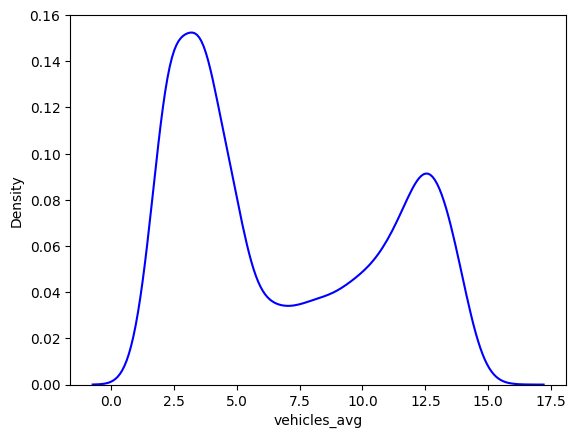

In [22]:
# Scelta del tipo di analisi da fare
input_valido = False
while not input_valido:
    scelta = int(input("Seleziona il tipo di analisi da effettuare:\n"
                       "+ Media del numero di veicoli nei giorni:\n"
                       "[1] tutti i giorni\n"
                       "[2] lavorativi\n"
                       "[3] sabato\n"
                       "[4] domenica\n"
                       "[5] giorno e notte nei giorni lavorativi\n"
                       "[0] EXIT\n"))

    if scelta == 1:
        functions_split_working_days_saturdays_sundays_mean.total_distributions(data_frame)
        input_valido = True
    elif scelta == 2:
        functions_split_working_days_saturdays_sundays_mean.working_days_distribution(data_frame_working_)
        input_valido = True
    elif scelta == 3:
        functions_split_working_days_saturdays_sundays_mean.saturdays_distribution(data_frame_saturday_)
        input_valido = True
    elif scelta == 4:
        functions_split_working_days_saturdays_sundays_mean.sundays_distribution(data_frame_sunday_)
        input_valido = True
    elif scelta == 5:
        functions_split_working_days_saturdays_sundays_mean.working_days_day_night_distribution(data_frame_working_)
        input_valido = True
    elif scelta == 0:
        input_valido = True
    else:
        print("ERRORE. Input non valido. Riprova.")
        input_valido = False

In [23]:
# Connessione a Neo4j per il successivo recupero dati
graph_detections = graph.Graph("bolt://localhost:7687", "neo4j", "nosqlproject")

In [24]:
# Scelta del tipo di analisi da fare
input_valido = False
while not input_valido:
    scelta = int(input("Seleziona il tipo di analisi da effettuare:\n"
                       "[1] Traffico sommando il numero di veicoli per ogni strada\n"
                       "[2] Traffico come media del numero di veicoli per ogni strada\n"
                       "[3] Mostrare tutte le strade della citta' selezionata\n"
                       "[4] Traffico delle strade ad un istante di tempo\n"
                       "[5] Traffico delle strade ad un istante di tempo, filtrando anche per numero di veicoli e per la velocita' media\n"
                       "[6] Mostrare la velocita' media e il traffico di una strada in uno specifico intervallo di tempo\n"
                       "[7] Filtra le rilevazioni di una strada per velocita' media e veicoli\n"
                       "[0] EXIT\n"))

    if scelta == 1:
        functions_traffic_analysis.traffic_sum_vehicles_for_street(mongodb_driver, rete_stradale, risoluzione_temporale, periodo_tempo)
        input_valido = True
    elif scelta == 2:
        functions_traffic_analysis.traffic_avg_vehicles_for_street(mongodb_driver, rete_stradale, risoluzione_temporale, periodo_tempo)
        input_valido = True
    elif scelta == 3:
        m = functions_traffic_analysis.show_street_of_city(mongodb_driver, rete_stradale)
        display(m)
        input_valido = True
    elif scelta == 4:
        m = functions_traffic_analysis.traffic_city_at_specific_time(mongodb_driver, graph_detections, rete_stradale, risoluzione_temporale, periodo_tempo)
        display(m)
        input_valido = True
    elif scelta == 5:
        m = functions_traffic_analysis.traffic_city_at_specific_time_filter_by_number_vehicles_avg_speed(mongodb_driver, graph_detections, rete_stradale, risoluzione_temporale, periodo_tempo)
        display(m)
        input_valido = True
    elif scelta == 6:
        functions_traffic_analysis.traffic_avg_speed_street_at_specific_timerange(mongodb_driver, graph_detections, rete_stradale, risoluzione_temporale, periodo_tempo)
        input_valido = True
    elif scelta == 7:
        functions_traffic_analysis.filter_specific_street_by_vehicles_and_avg_speed(mongodb_driver, graph_detections, rete_stradale, risoluzione_temporale, periodo_tempo)
        input_valido = True
    elif scelta == 0:
        input_valido = True
    else:
        print("ERRORE. Input non valido. Riprova.")
        input_valido = False

TIMESTAMP :  2019-01-21 16:10:00


In [ ]:
# Chiusura della connessione ai database
graph_detections.close()
mongodb_driver.close()